In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import files
files.upload()

Saving Housing.csv to Housing.csv


{'Housing.csv': b'price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus\r\n13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished\r\n12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished\r\n12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished\r\n12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished\r\n11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished\r\n10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished\r\n10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished\r\n10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished\r\n9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished\r\n9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished\r\n9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished\r\n9681000,6000,4,3,2,yes,yes,yes,yes,no,2,no,semi-furnished\r\n9310000,6550,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished\r\n9240000,3500,4,2,2,yes,no,no,yes,no,2,no,furnished\r\n9240000,7800,3,2,2,yes,no,no,no,no

In [ ]:
data = pd.read_csv("Housing.csv")

print("First 5 rows of dataset:")
print(data.head())

print("\nDataset Info:")
print(data.info())

First 5 rows of dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entri

In [ ]:
# Check missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Convert categorical variables into numerical (One-Hot Encoding)
data_encoded = pd.get_dummies(data, drop_first=True)

print("\nEncoded Dataset:")
print(data_encoded.head())


Missing Values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Encoded Dataset:
      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 T

In [ ]:
# Target variable
y = data_encoded["price"]

# Feature variables
X = data_encoded.drop("price", axis=1)

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [ ]:
#Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Model Performance:
Mean Squared Error (MSE): 1754318687330.6638
R-squared (R²): 0.6529242642153184


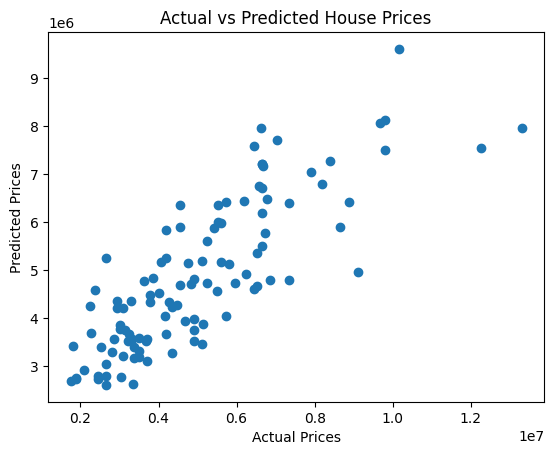

In [ ]:
# Visualization: Actual vs Predicted

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

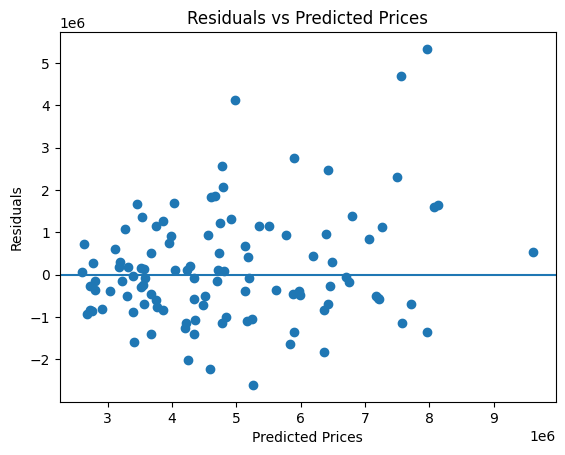

In [ ]:
# Visualization: Residual Plot

residuals = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Prices")
plt.show()

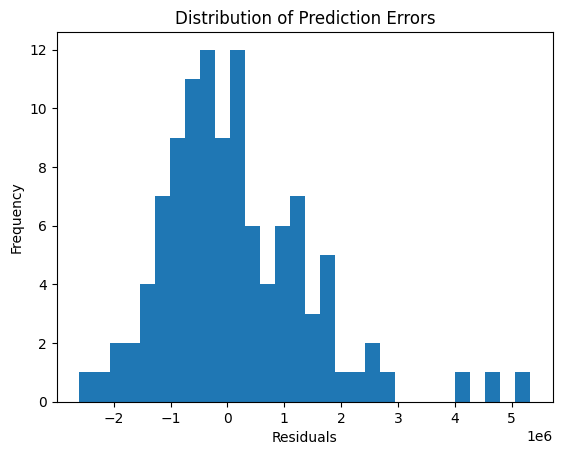

In [ ]:
# Visualization: Error Distribution

plt.figure()
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()

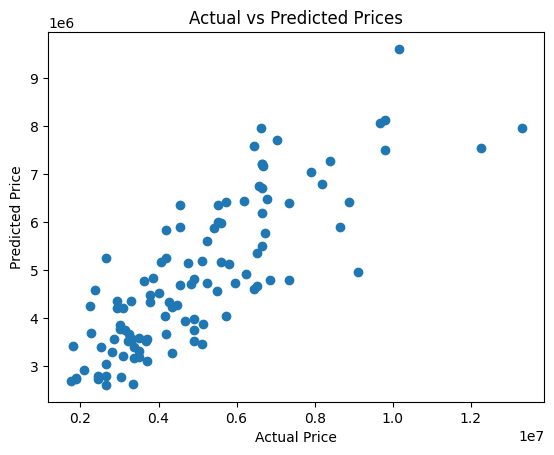

In [ ]:
# Actual vs Predicted

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

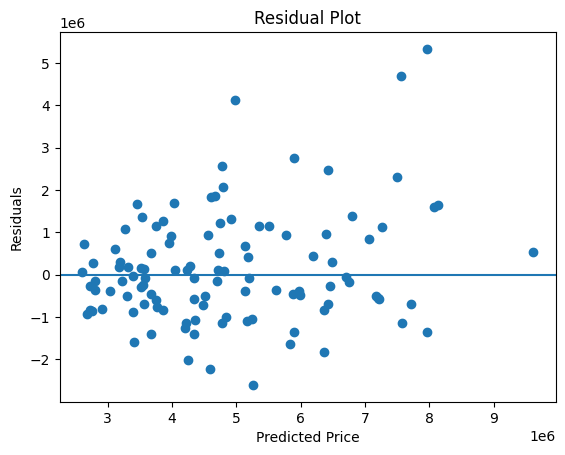

In [ ]:
# Residual Plot

residuals = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

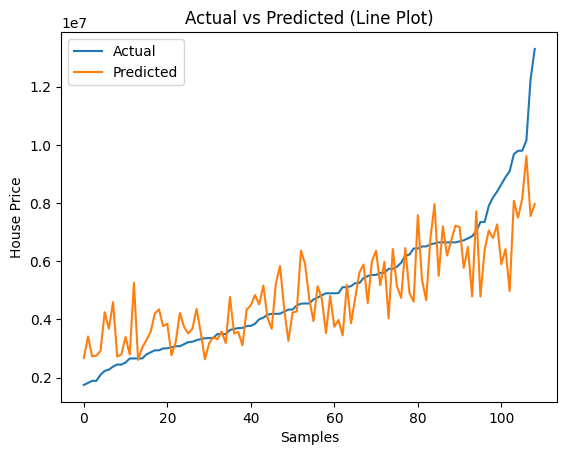

In [ ]:
# Line Plot (Sorted)

sorted_index = y_test.sort_values().index

plt.figure()
plt.plot(y_test.loc[sorted_index].values, label="Actual")
plt.plot(pd.Series(y_pred, index=y_test.index).loc[sorted_index].values, label="Predicted")
plt.xlabel("Samples")
plt.ylabel("House Price")
plt.title("Actual vs Predicted (Line Plot)")
plt.legend()
plt.show()


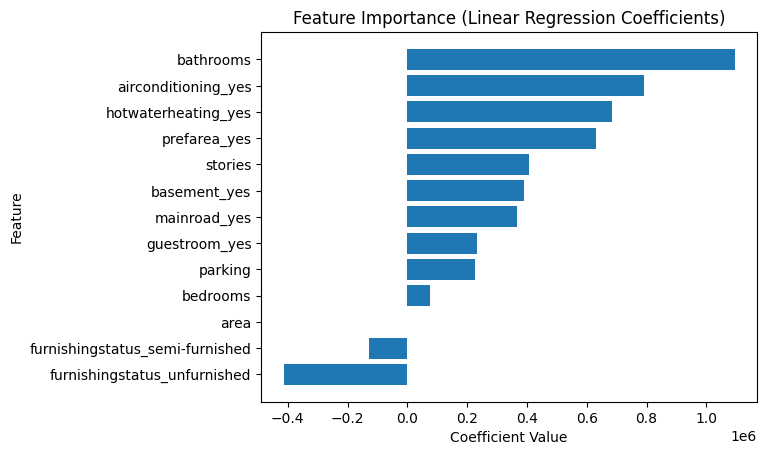

In [ ]:
# Feature Importance Bar Chart

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient")

plt.figure()
plt.barh(coefficients["Feature"], coefficients["Coefficient"])
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()


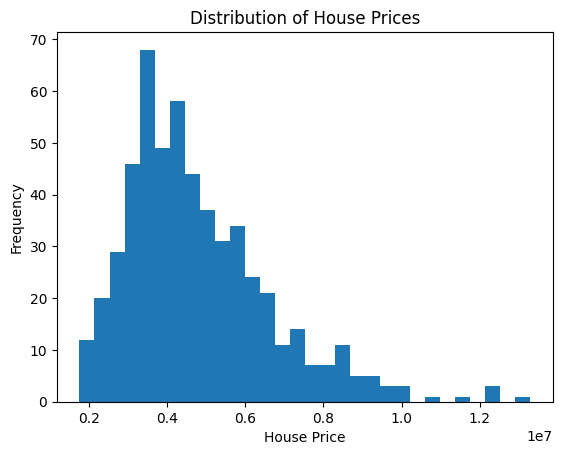

In [ ]:
# Price Distribution

plt.figure()
plt.hist(y, bins=30)
plt.xlabel("House Price")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices")
plt.show()


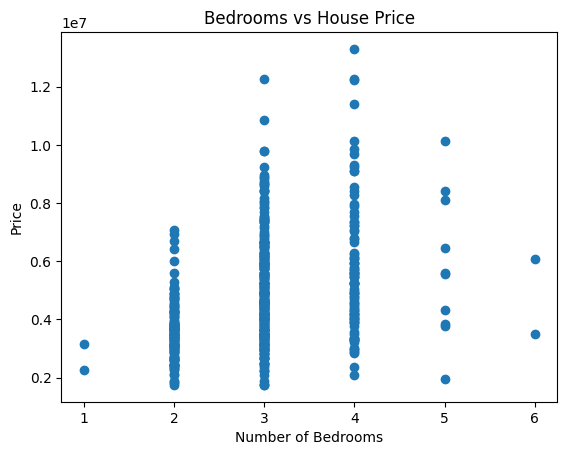

In [ ]:
# Bedrooms vs Price

if "bedrooms" in data.columns:
    plt.figure()
    plt.scatter(data["bedrooms"], data["price"])
    plt.xlabel("Number of Bedrooms")
    plt.ylabel("Price")
    plt.title("Bedrooms vs House Price")
    plt.show()

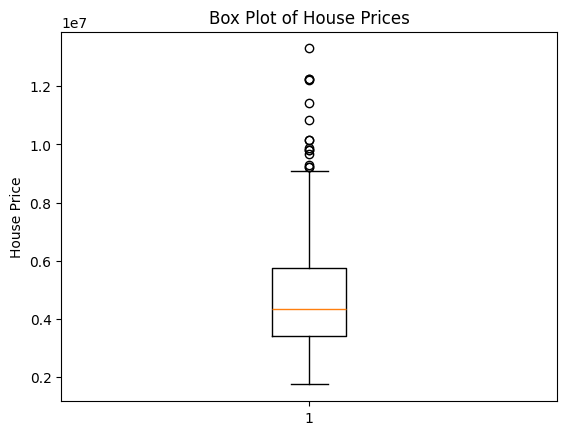

In [ ]:
# Box Plot of Price

plt.figure()
plt.boxplot(y)
plt.ylabel("House Price")
plt.title("Box Plot of House Prices")
plt.show()

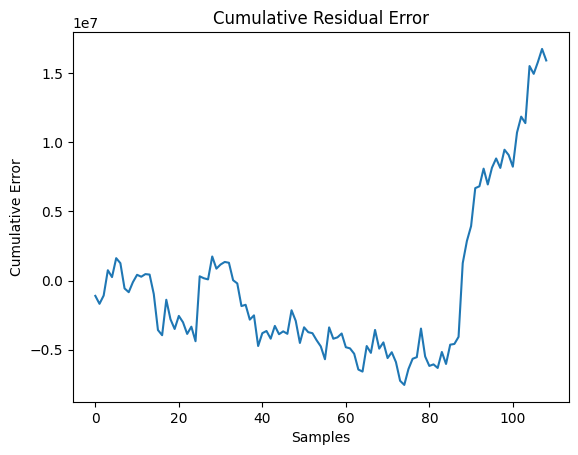

In [ ]:
# Cumulative Error Plot

plt.figure()
plt.plot(np.cumsum(residuals.values))
plt.xlabel("Samples")
plt.ylabel("Cumulative Error")
plt.title("Cumulative Residual Error")
plt.show()

In [ ]:
# Feature Importance (Coefficients)

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\nTop Influential Features:")
print(coefficients.head(10))



Top Influential Features:
                Feature   Coefficient
2             bathrooms  1.094445e+06
9   airconditioning_yes  7.914267e+05
8   hotwaterheating_yes  6.846499e+05
10         prefarea_yes  6.298906e+05
3               stories  4.074766e+05
7          basement_yes  3.902512e+05
5          mainroad_yes  3.679199e+05
6         guestroom_yes  2.316100e+05
4               parking  2.248419e+05
1              bedrooms  7.677870e+04
